# References

- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2655800/
- https://lena-voita.github.io/nlp_course/language_modeling.html
- https://en.wikipedia.org/wiki/Perplexity
- https://github.com/singnet/language-learning/issues/255
- https://medium.com/mlearning-ai/word-embeddings-wordpiece-and-language-agnostic-bert-labse-98c7626878c7


- https://github.com/natasha/razdel - razdel tries to mimic segmentation of these 4 datasets: SynTagRus, OpenCorpora, GICRYA and RNC. 
- https://www.kaggle.com/c/text-normalization-challenge-english-language
- https://www.kaggle.com/c/text-normalization-challenge-russian-language




In [26]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

#from importlib import reload  # Python 3.4+

import pickle
import pandas as pd

#force reimport
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']
if 'pygents.text' in sys.modules:
    del sys.modules['pygents.text']
if 'pygents.plot' in sys.modules:
    del sys.modules['pygents.plot']
if 'pygents.token' in sys.modules:
    del sys.modules['pygents.token']


from pygents.token import *
from pygents.text import *
from pygents.util import *
from pygents.plot import plot_bars, plot_dict, matrix_plot


In [33]:
brown_chars = FreedomTokenizer(name='data/models/brown_nolines_chars_7a',max_n=7,mode='chars',debug=False)
print(brown_chars.count_params())


10967135
33960499


In [23]:
#IP may be blacklisted
#brown_text_lines = url_text_lines("http://www.sls.hawaii.edu/bley-vroman/brown_nolines.txt")

brown_text_lines =[line for line in open('data/media/brown_nolines.txt', 'r').readlines()]
print(len(brown_text_lines))
assert len(brown_text_lines) == 19810

19810


In [24]:
test_texts = text_lines_sample(brown_text_lines,10,[" ","#"])


N	thres.	F1
[1]	0.2	0.73
[1]	0.3	0.75
[1]	0.4	0.71
[1]	0.5	0.69
[1]	0.6	0.69
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.57
[1, 2]	0.3	0.75
[1, 2]	0.4	0.93
[1, 2]	0.5	0.93
[1, 2]	0.6	0.85
[1, 2]	0.7	0.8
[1, 2]	0.8	0.76
[2, 3]	0.2	0.65
[2, 3]	0.3	0.77
[2, 3]	0.4	0.83
[2, 3]	0.5	0.81
[2, 3]	0.6	0.78
[2, 3]	0.7	0.64
[2, 3]	0.8	0.53
[1, 2, 3]	0.2	0.72
[1, 2, 3]	0.3	0.86
[1, 2, 3]	0.4	0.88
[1, 2, 3]	0.5	0.89
[1, 2, 3]	0.6	0.82
[1, 2, 3]	0.7	0.69
[1, 2, 3]	0.8	0.56
[1, 2, 3, 4]	0.2	0.81
[1, 2, 3, 4]	0.3	0.88
[1, 2, 3, 4]	0.4	0.84
[1, 2, 3, 4]	0.5	0.78
[1, 2, 3, 4]	0.6	0.69
[1, 2, 3, 4]	0.7	0.51
[1, 2, 3, 4]	0.8	0.4


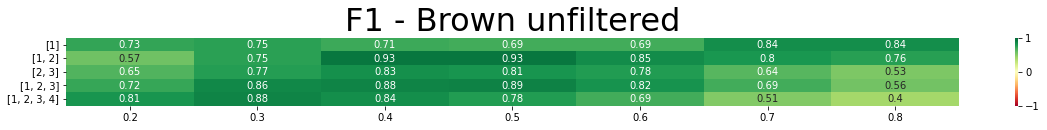

In [27]:
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append((evaluate_tokenizer(brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False)))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown unfiltered') 

8643703
N	thres.	F1
[1]	0.2	0.94
[1]	0.3	0.97
[1]	0.4	0.99
[1]	0.5	0.97
[1]	0.6	0.9
[1]	0.7	0.91
[1]	0.8	0.91
[1, 2]	0.2	0.62
[1, 2]	0.3	0.78
[1, 2]	0.4	0.95
[1, 2]	0.5	0.96
[1, 2]	0.6	0.92
[1, 2]	0.7	0.84
[1, 2]	0.8	0.79
[2, 3]	0.2	0.65
[2, 3]	0.3	0.76
[2, 3]	0.4	0.84
[2, 3]	0.5	0.83
[2, 3]	0.6	0.8
[2, 3]	0.7	0.68
[2, 3]	0.8	0.55
[1, 2, 3]	0.2	0.72
[1, 2, 3]	0.3	0.85
[1, 2, 3]	0.4	0.92
[1, 2, 3]	0.5	0.89
[1, 2, 3]	0.6	0.85
[1, 2, 3]	0.7	0.72
[1, 2, 3]	0.8	0.59
[1, 2, 3, 4]	0.2	0.8
[1, 2, 3, 4]	0.3	0.88
[1, 2, 3, 4]	0.4	0.86
[1, 2, 3, 4]	0.5	0.8
[1, 2, 3, 4]	0.6	0.71
[1, 2, 3, 4]	0.7	0.55
[1, 2, 3, 4]	0.8	0.41


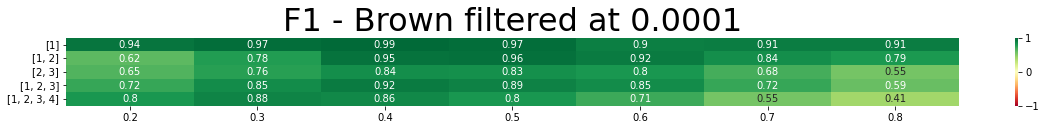

In [28]:
model_compress_with_loss(brown_chars.model,0.0001)
print(brown_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append((evaluate_tokenizer(brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False)))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown filtered at 0.0001') 


8596119
N	thres.	F1
[1]	0.2	0.63
[1]	0.3	0.63
[1]	0.4	0.86
[1]	0.5	0.97
[1]	0.6	0.92
[1]	0.7	0.85
[1]	0.8	0.84
[1, 2]	0.2	0.64
[1, 2]	0.3	0.78
[1, 2]	0.4	0.87
[1, 2]	0.5	0.96
[1, 2]	0.6	0.94
[1, 2]	0.7	0.78
[1, 2]	0.8	0.7
[2, 3]	0.2	0.69
[2, 3]	0.3	0.81
[2, 3]	0.4	0.87
[2, 3]	0.5	0.88
[2, 3]	0.6	0.78
[2, 3]	0.7	0.64
[2, 3]	0.8	0.39
[1, 2, 3]	0.2	0.72
[1, 2, 3]	0.3	0.84
[1, 2, 3]	0.4	0.93
[1, 2, 3]	0.5	0.93
[1, 2, 3]	0.6	0.87
[1, 2, 3]	0.7	0.73
[1, 2, 3]	0.8	0.48
[1, 2, 3, 4]	0.2	0.77
[1, 2, 3, 4]	0.3	0.91
[1, 2, 3, 4]	0.4	0.91
[1, 2, 3, 4]	0.5	0.87
[1, 2, 3, 4]	0.6	0.77
[1, 2, 3, 4]	0.7	0.61
[1, 2, 3, 4]	0.8	0.38


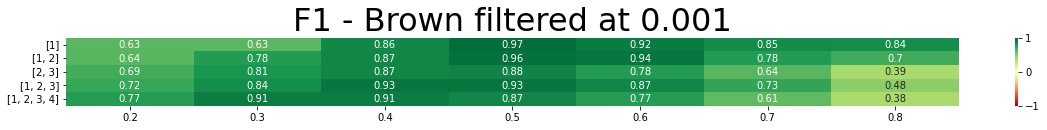

In [29]:
model_compress_with_loss(brown_chars.model,0.001)
print(brown_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append((evaluate_tokenizer(brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False)))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown filtered at 0.001') 


8471014
N	thres.	F1
[1]	0.2	0.44
[1]	0.3	0.63
[1]	0.4	0.79
[1]	0.5	0.67
[1]	0.6	0.38
[1]	0.7	0.4
[1]	0.8	0.36
[1, 2]	0.2	0.51
[1, 2]	0.3	0.66
[1, 2]	0.4	0.83
[1, 2]	0.5	0.84
[1, 2]	0.6	0.64
[1, 2]	0.7	0.41
[1, 2]	0.8	0.34
[2, 3]	0.2	0.54
[2, 3]	0.3	0.67
[2, 3]	0.4	0.78
[2, 3]	0.5	0.81
[2, 3]	0.6	0.65
[2, 3]	0.7	0.48
[2, 3]	0.8	0.38
[1, 2, 3]	0.2	0.55
[1, 2, 3]	0.3	0.72
[1, 2, 3]	0.4	0.84
[1, 2, 3]	0.5	0.87
[1, 2, 3]	0.6	0.69
[1, 2, 3]	0.7	0.47
[1, 2, 3]	0.8	0.33
[1, 2, 3, 4]	0.2	0.54
[1, 2, 3, 4]	0.3	0.7
[1, 2, 3, 4]	0.4	0.82
[1, 2, 3, 4]	0.5	0.86
[1, 2, 3, 4]	0.6	0.7
[1, 2, 3, 4]	0.7	0.49
[1, 2, 3, 4]	0.8	0.35


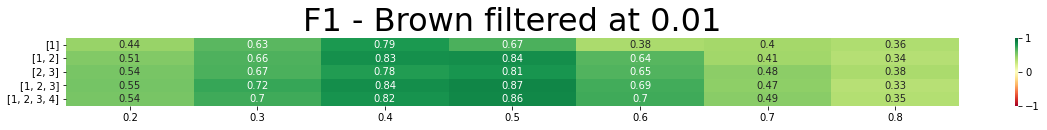

In [30]:
model_compress_with_loss(brown_chars.model,0.01)
print(brown_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append((evaluate_tokenizer(brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False)))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown filtered at 0.01') 


In [31]:
del brown_chars

In [42]:
brown_grams = FreedomTokenizer(name='data/models/brown_nolines_grams_7a',max_n=7,mode='grams',debug=False)
print(brown_grams.count_params())


33960499


N	thres.	F1
[1]	0.2	0.73
[1]	0.3	0.75
[1]	0.4	0.71
[1]	0.5	0.69
[1]	0.6	0.69
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.57
[1, 2]	0.3	0.63
[1, 2]	0.4	0.63
[1, 2]	0.5	0.68
[1, 2]	0.6	0.63
[1, 2]	0.7	0.5
[1, 2]	0.8	0.33
[2, 3]	0.2	0.67
[2, 3]	0.3	0.57
[2, 3]	0.4	0.48
[2, 3]	0.5	0.37
[2, 3]	0.6	0.34
[2, 3]	0.7	0.32
[2, 3]	0.8	0.31
[1, 2, 3]	0.2	0.67
[1, 2, 3]	0.3	0.57
[1, 2, 3]	0.4	0.48
[1, 2, 3]	0.5	0.38
[1, 2, 3]	0.6	0.34
[1, 2, 3]	0.7	0.32
[1, 2, 3]	0.8	0.31
[1, 2, 3, 4]	0.2	0.51
[1, 2, 3, 4]	0.3	0.42
[1, 2, 3, 4]	0.4	0.36
[1, 2, 3, 4]	0.5	0.32
[1, 2, 3, 4]	0.6	0.32
[1, 2, 3, 4]	0.7	0.31
[1, 2, 3, 4]	0.8	0.31


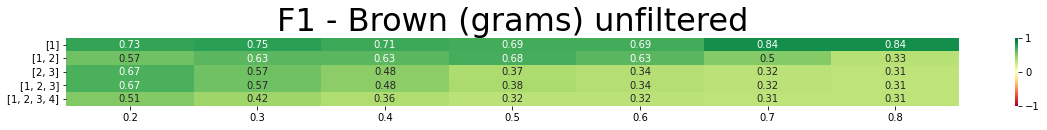

In [43]:
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(brown_grams.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown (grams) unfiltered') 


In [48]:
del brown_grams

In [44]:
brown_chars = FreedomTokenizer(name='data/models/brown_nolines_chars_7a',max_n=7,mode='chars',debug=False)
print(brown_chars.count_params())


10967135


N	thres.	F1
[1]	0.2	0.74
[1]	0.3	0.71
[1]	0.4	0.78
[1]	0.5	0.56
[1]	0.6	0.43
[1]	0.7	0.37
[1]	0.8	0.3
[1, 2]	0.2	0.75
[1, 2]	0.3	0.87
[1, 2]	0.4	0.92
[1, 2]	0.5	0.85
[1, 2]	0.6	0.66
[1, 2]	0.7	0.4
[1, 2]	0.8	0.32
[2, 3]	0.2	0.76
[2, 3]	0.3	0.84
[2, 3]	0.4	0.79
[2, 3]	0.5	0.68
[2, 3]	0.6	0.48
[2, 3]	0.7	0.33
[2, 3]	0.8	0.3
[1, 2, 3]	0.2	0.78
[1, 2, 3]	0.3	0.89
[1, 2, 3]	0.4	0.89
[1, 2, 3]	0.5	0.76
[1, 2, 3]	0.6	0.57
[1, 2, 3]	0.7	0.38
[1, 2, 3]	0.8	0.31
[1, 2, 3, 4]	0.2	0.83
[1, 2, 3, 4]	0.3	0.87
[1, 2, 3, 4]	0.4	0.78
[1, 2, 3, 4]	0.5	0.65
[1, 2, 3, 4]	0.6	0.48
[1, 2, 3, 4]	0.7	0.34
[1, 2, 3, 4]	0.8	0.31


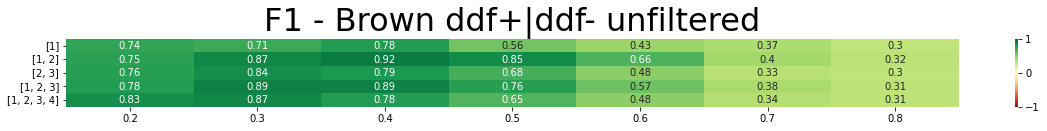

In [45]:
# just use one parameter 
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(brown_chars.model,test_texts,'ddf+|ddf-',None,nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown ddf+|ddf- unfiltered') 


8643703
N	thres.	F1
[1]	0.2	0.98
[1]	0.3	0.97
[1]	0.4	0.94
[1]	0.5	0.49
[1]	0.6	0.46
[1]	0.7	0.3
[1]	0.8	0.3
[1, 2]	0.2	0.77
[1, 2]	0.3	0.96
[1, 2]	0.4	0.94
[1, 2]	0.5	0.89
[1, 2]	0.6	0.63
[1, 2]	0.7	0.36
[1, 2]	0.8	0.3
[2, 3]	0.2	0.76
[2, 3]	0.3	0.85
[2, 3]	0.4	0.81
[2, 3]	0.5	0.69
[2, 3]	0.6	0.49
[2, 3]	0.7	0.32
[2, 3]	0.8	0.3
[1, 2, 3]	0.2	0.83
[1, 2, 3]	0.3	0.92
[1, 2, 3]	0.4	0.89
[1, 2, 3]	0.5	0.74
[1, 2, 3]	0.6	0.53
[1, 2, 3]	0.7	0.33
[1, 2, 3]	0.8	0.3
[1, 2, 3, 4]	0.2	0.85
[1, 2, 3, 4]	0.3	0.87
[1, 2, 3, 4]	0.4	0.79
[1, 2, 3, 4]	0.5	0.62
[1, 2, 3, 4]	0.6	0.46
[1, 2, 3, 4]	0.7	0.33
[1, 2, 3, 4]	0.8	0.3


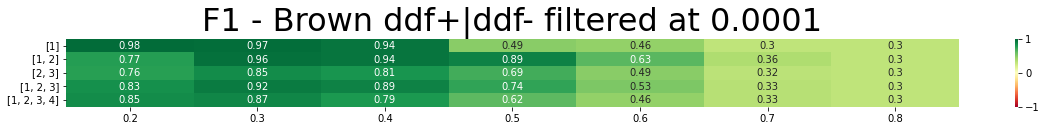

In [46]:
model_compress_with_loss(brown_chars.model,0.0001)
print(brown_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(brown_chars.model,test_texts,'ddf+|ddf-',None,nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown ddf+|ddf- filtered at 0.0001') 


8596119
N	thres.	F1
[1]	0.2	0.89
[1]	0.3	0.97
[1]	0.4	0.84
[1]	0.5	0.48
[1]	0.6	0.32
[1]	0.7	0.32
[1]	0.8	0.31
[1, 2]	0.2	0.79
[1, 2]	0.3	0.97
[1, 2]	0.4	0.92
[1, 2]	0.5	0.7
[1, 2]	0.6	0.43
[1, 2]	0.7	0.32
[1, 2]	0.8	0.3
[2, 3]	0.2	0.76
[2, 3]	0.3	0.87
[2, 3]	0.4	0.82
[2, 3]	0.5	0.64
[2, 3]	0.6	0.43
[2, 3]	0.7	0.34
[2, 3]	0.8	0.31
[1, 2, 3]	0.2	0.83
[1, 2, 3]	0.3	0.94
[1, 2, 3]	0.4	0.89
[1, 2, 3]	0.5	0.72
[1, 2, 3]	0.6	0.44
[1, 2, 3]	0.7	0.34
[1, 2, 3]	0.8	0.31
[1, 2, 3, 4]	0.2	0.84
[1, 2, 3, 4]	0.3	0.91
[1, 2, 3, 4]	0.4	0.83
[1, 2, 3, 4]	0.5	0.65
[1, 2, 3, 4]	0.6	0.47
[1, 2, 3, 4]	0.7	0.35
[1, 2, 3, 4]	0.8	0.32


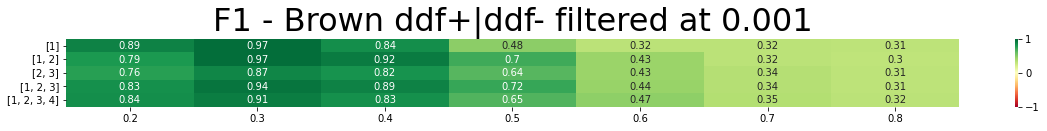

In [47]:
model_compress_with_loss(brown_chars.model,0.001)
print(brown_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(brown_chars.model,test_texts,'ddf+|ddf-',None,nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown ddf+|ddf- filtered at 0.001') 


In [49]:
del brown_chars

In [50]:
adult_chars = FreedomTokenizer(name='data/models/gutenberg_adult_chars_7a',max_n=7,mode='chars',debug=False)


N	thres.	F1
[1]	0.2	0.68
[1]	0.3	0.75
[1]	0.4	0.84
[1]	0.5	0.84
[1]	0.6	0.84
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.63
[1, 2]	0.3	0.78
[1, 2]	0.4	0.91
[1, 2]	0.5	0.87
[1, 2]	0.6	0.8
[1, 2]	0.7	0.72
[1, 2]	0.8	0.52
[2, 3]	0.2	0.56
[2, 3]	0.3	0.73
[2, 3]	0.4	0.69
[2, 3]	0.5	0.59
[2, 3]	0.6	0.48
[2, 3]	0.7	0.4
[2, 3]	0.8	0.34
[1, 2, 3]	0.2	0.72
[1, 2, 3]	0.3	0.83
[1, 2, 3]	0.4	0.84
[1, 2, 3]	0.5	0.77
[1, 2, 3]	0.6	0.64
[1, 2, 3]	0.7	0.46
[1, 2, 3]	0.8	0.37
[1, 2, 3, 4]	0.2	0.75
[1, 2, 3, 4]	0.3	0.79
[1, 2, 3, 4]	0.4	0.73
[1, 2, 3, 4]	0.5	0.61
[1, 2, 3, 4]	0.6	0.46
[1, 2, 3, 4]	0.7	0.36
[1, 2, 3, 4]	0.8	0.32


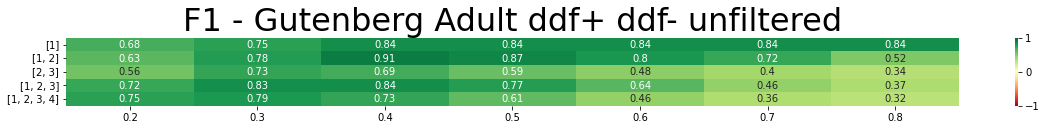

In [51]:
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(adult_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult ddf+ ddf- unfiltered') 


31447648
N	thres.	F1
[1]	0.2	0.68
[1]	0.3	0.75
[1]	0.4	0.84
[1]	0.5	0.84
[1]	0.6	0.84
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.63
[1, 2]	0.3	0.78
[1, 2]	0.4	0.91
[1, 2]	0.5	0.87
[1, 2]	0.6	0.8
[1, 2]	0.7	0.72
[1, 2]	0.8	0.52
[2, 3]	0.2	0.56
[2, 3]	0.3	0.73
[2, 3]	0.4	0.69
[2, 3]	0.5	0.59
[2, 3]	0.6	0.48
[2, 3]	0.7	0.4
[2, 3]	0.8	0.34
[1, 2, 3]	0.2	0.72
[1, 2, 3]	0.3	0.83
[1, 2, 3]	0.4	0.84
[1, 2, 3]	0.5	0.77
[1, 2, 3]	0.6	0.64
[1, 2, 3]	0.7	0.46
[1, 2, 3]	0.8	0.37
[1, 2, 3, 4]	0.2	0.75
[1, 2, 3, 4]	0.3	0.79
[1, 2, 3, 4]	0.4	0.73
[1, 2, 3, 4]	0.5	0.61
[1, 2, 3, 4]	0.6	0.46
[1, 2, 3, 4]	0.7	0.36
[1, 2, 3, 4]	0.8	0.32


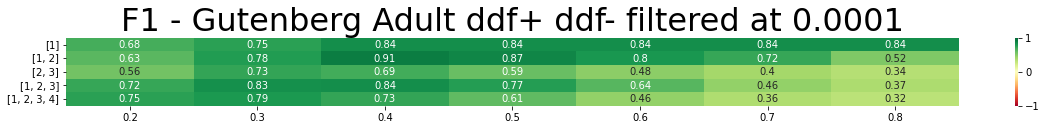

In [52]:
model_compress_with_loss(adult_chars.model,0.0001)
print(adult_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(adult_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult ddf+ ddf- filtered at 0.0001') 


30751368
N	thres.	F1
[1]	0.2	0.54
[1]	0.3	0.62
[1]	0.4	0.62
[1]	0.5	0.64
[1]	0.6	0.81
[1]	0.7	0.88
[1]	0.8	0.84
[1, 2]	0.2	0.58
[1, 2]	0.3	0.66
[1, 2]	0.4	0.78
[1, 2]	0.5	0.84
[1, 2]	0.6	0.86
[1, 2]	0.7	0.73
[1, 2]	0.8	0.5
[2, 3]	0.2	0.59
[2, 3]	0.3	0.73
[2, 3]	0.4	0.72
[2, 3]	0.5	0.6
[2, 3]	0.6	0.48
[2, 3]	0.7	0.4
[2, 3]	0.8	0.34
[1, 2, 3]	0.2	0.61
[1, 2, 3]	0.3	0.8
[1, 2, 3]	0.4	0.84
[1, 2, 3]	0.5	0.77
[1, 2, 3]	0.6	0.62
[1, 2, 3]	0.7	0.45
[1, 2, 3]	0.8	0.36
[1, 2, 3, 4]	0.2	0.7
[1, 2, 3, 4]	0.3	0.78
[1, 2, 3, 4]	0.4	0.71
[1, 2, 3, 4]	0.5	0.58
[1, 2, 3, 4]	0.6	0.45
[1, 2, 3, 4]	0.7	0.37
[1, 2, 3, 4]	0.8	0.33


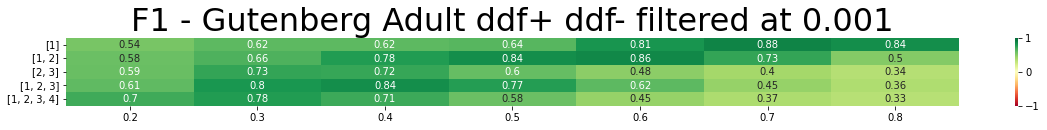

In [53]:
model_compress_with_loss(adult_chars.model,0.001)
print(adult_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(adult_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult ddf+ ddf- filtered at 0.001') 


30718930
N	thres.	F1
[1]	0.2	0.42
[1]	0.3	0.51
[1]	0.4	0.79
[1]	0.5	0.96
[1]	0.6	0.39
[1]	0.7	0.39
[1]	0.8	0.38
[1, 2]	0.2	0.5
[1, 2]	0.3	0.6
[1, 2]	0.4	0.8
[1, 2]	0.5	0.84
[1, 2]	0.6	0.59
[1, 2]	0.7	0.34
[1, 2]	0.8	0.3
[2, 3]	0.2	0.5
[2, 3]	0.3	0.59
[2, 3]	0.4	0.64
[2, 3]	0.5	0.6
[2, 3]	0.6	0.5
[2, 3]	0.7	0.4
[2, 3]	0.8	0.32
[1, 2, 3]	0.2	0.52
[1, 2, 3]	0.3	0.65
[1, 2, 3]	0.4	0.73
[1, 2, 3]	0.5	0.75
[1, 2, 3]	0.6	0.6
[1, 2, 3]	0.7	0.4
[1, 2, 3]	0.8	0.34
[1, 2, 3, 4]	0.2	0.57
[1, 2, 3, 4]	0.3	0.66
[1, 2, 3, 4]	0.4	0.66
[1, 2, 3, 4]	0.5	0.58
[1, 2, 3, 4]	0.6	0.44
[1, 2, 3, 4]	0.7	0.36
[1, 2, 3, 4]	0.8	0.32


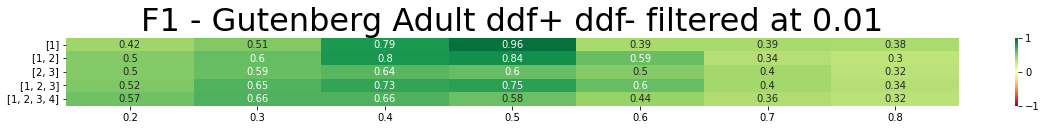

In [54]:
model_compress_with_loss(adult_chars.model,0.01)
print(adult_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(adult_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult ddf+ ddf- filtered at 0.01') 


In [55]:
del adult_chars

N	thres.	F1
[1]	0.2	0.68
[1]	0.3	0.75
[1]	0.4	0.84
[1]	0.5	0.84
[1]	0.6	0.84
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.53
[1, 2]	0.3	0.6
[1, 2]	0.4	0.63
[1, 2]	0.5	0.59
[1, 2]	0.6	0.48
[1, 2]	0.7	0.4
[1, 2]	0.8	0.37
[2, 3]	0.2	0.56
[2, 3]	0.3	0.47
[2, 3]	0.4	0.36
[2, 3]	0.5	0.35
[2, 3]	0.6	0.33
[2, 3]	0.7	0.31
[2, 3]	0.8	0.31
[1, 2, 3]	0.2	0.57
[1, 2, 3]	0.3	0.49
[1, 2, 3]	0.4	0.37
[1, 2, 3]	0.5	0.35
[1, 2, 3]	0.6	0.32
[1, 2, 3]	0.7	0.31
[1, 2, 3]	0.8	0.31
[1, 2, 3, 4]	0.2	0.48
[1, 2, 3, 4]	0.3	0.43
[1, 2, 3, 4]	0.4	0.37
[1, 2, 3, 4]	0.5	0.34
[1, 2, 3, 4]	0.6	0.32
[1, 2, 3, 4]	0.7	0.31
[1, 2, 3, 4]	0.8	0.31


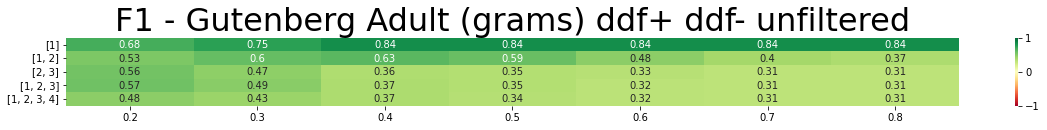

In [56]:
adult_grams = FreedomTokenizer(name='data/models/gutenberg_adult_grams_7a',max_n=7,mode='grams',debug=False)
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(adult_grams.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult (grams) ddf+ ddf- unfiltered') 


40143566
N	thres.	F1
[1]	0.2	0.68
[1]	0.3	0.75
[1]	0.4	0.84
[1]	0.5	0.84
[1]	0.6	0.84
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.53
[1, 2]	0.3	0.6
[1, 2]	0.4	0.63
[1, 2]	0.5	0.59
[1, 2]	0.6	0.48
[1, 2]	0.7	0.4
[1, 2]	0.8	0.37
[2, 3]	0.2	0.56
[2, 3]	0.3	0.47
[2, 3]	0.4	0.36
[2, 3]	0.5	0.35
[2, 3]	0.6	0.33
[2, 3]	0.7	0.31
[2, 3]	0.8	0.31
[1, 2, 3]	0.2	0.57
[1, 2, 3]	0.3	0.49
[1, 2, 3]	0.4	0.37
[1, 2, 3]	0.5	0.35
[1, 2, 3]	0.6	0.32
[1, 2, 3]	0.7	0.31
[1, 2, 3]	0.8	0.31
[1, 2, 3, 4]	0.2	0.48
[1, 2, 3, 4]	0.3	0.43
[1, 2, 3, 4]	0.4	0.37
[1, 2, 3, 4]	0.5	0.34
[1, 2, 3, 4]	0.6	0.32
[1, 2, 3, 4]	0.7	0.31
[1, 2, 3, 4]	0.8	0.31


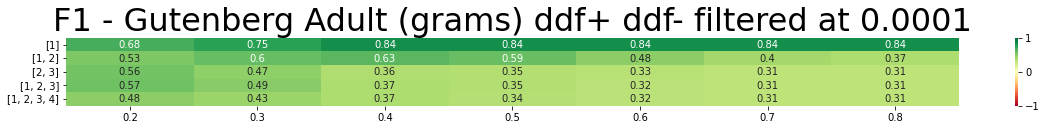

In [57]:
model_compress_with_loss(adult_grams.model,0.0001)
print(adult_grams.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(adult_grams.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult (grams) ddf+ ddf- filtered at 0.0001') 


39446341
N	thres.	F1
[1]	0.2	0.54
[1]	0.3	0.62
[1]	0.4	0.62
[1]	0.5	0.64
[1]	0.6	0.81
[1]	0.7	0.88
[1]	0.8	0.84
[1, 2]	0.2	0.53
[1, 2]	0.3	0.6
[1, 2]	0.4	0.63
[1, 2]	0.5	0.6
[1, 2]	0.6	0.48
[1, 2]	0.7	0.4
[1, 2]	0.8	0.38
[2, 3]	0.2	0.57
[2, 3]	0.3	0.47
[2, 3]	0.4	0.36
[2, 3]	0.5	0.35
[2, 3]	0.6	0.33
[2, 3]	0.7	0.31
[2, 3]	0.8	0.31
[1, 2, 3]	0.2	0.58
[1, 2, 3]	0.3	0.49
[1, 2, 3]	0.4	0.37
[1, 2, 3]	0.5	0.35
[1, 2, 3]	0.6	0.32
[1, 2, 3]	0.7	0.31
[1, 2, 3]	0.8	0.31
[1, 2, 3, 4]	0.2	0.48
[1, 2, 3, 4]	0.3	0.43
[1, 2, 3, 4]	0.4	0.37
[1, 2, 3, 4]	0.5	0.34
[1, 2, 3, 4]	0.6	0.32
[1, 2, 3, 4]	0.7	0.31
[1, 2, 3, 4]	0.8	0.31


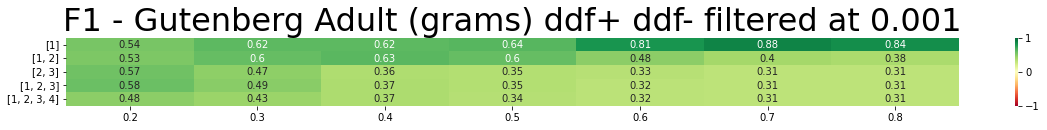

In [58]:
model_compress_with_loss(adult_grams.model,0.001)
print(adult_grams.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(adult_grams.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult (grams) ddf+ ddf- filtered at 0.001') 


In [59]:
del adult_grams


N	thres.	F1
[1]	0.2	0.61
[1]	0.3	0.6
[1]	0.4	0.63
[1]	0.5	0.83
[1]	0.6	0.84
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.54
[1, 2]	0.3	0.64
[1, 2]	0.4	0.7
[1, 2]	0.5	0.77
[1, 2]	0.6	0.78
[1, 2]	0.7	0.77
[1, 2]	0.8	0.66
[2, 3]	0.2	0.49
[2, 3]	0.3	0.66
[2, 3]	0.4	0.71
[2, 3]	0.5	0.69
[2, 3]	0.6	0.58
[2, 3]	0.7	0.42
[2, 3]	0.8	0.34
[1, 2, 3]	0.2	0.54
[1, 2, 3]	0.3	0.71
[1, 2, 3]	0.4	0.81
[1, 2, 3]	0.5	0.79
[1, 2, 3]	0.6	0.71
[1, 2, 3]	0.7	0.56
[1, 2, 3]	0.8	0.37
[1, 2, 3, 4]	0.2	0.57
[1, 2, 3, 4]	0.3	0.73
[1, 2, 3, 4]	0.4	0.77
[1, 2, 3, 4]	0.5	0.71
[1, 2, 3, 4]	0.6	0.55
[1, 2, 3, 4]	0.7	0.44
[1, 2, 3, 4]	0.8	0.35


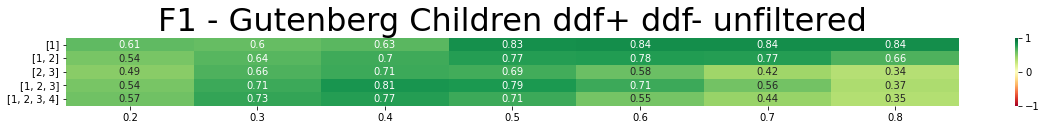

In [60]:
child_chars = FreedomTokenizer(name='data/models/gutenberg_child_chars_7a',max_n=7,mode='chars',debug=False)
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(child_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Children ddf+ ddf- unfiltered') 


8561292
N	thres.	F1
[1]	0.2	0.61
[1]	0.3	0.6
[1]	0.4	0.63
[1]	0.5	0.83
[1]	0.6	0.84
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.54
[1, 2]	0.3	0.64
[1, 2]	0.4	0.7
[1, 2]	0.5	0.77
[1, 2]	0.6	0.78
[1, 2]	0.7	0.77
[1, 2]	0.8	0.66
[2, 3]	0.2	0.49
[2, 3]	0.3	0.66
[2, 3]	0.4	0.71
[2, 3]	0.5	0.69
[2, 3]	0.6	0.58
[2, 3]	0.7	0.42
[2, 3]	0.8	0.34
[1, 2, 3]	0.2	0.54
[1, 2, 3]	0.3	0.71
[1, 2, 3]	0.4	0.81
[1, 2, 3]	0.5	0.79
[1, 2, 3]	0.6	0.71
[1, 2, 3]	0.7	0.56
[1, 2, 3]	0.8	0.37
[1, 2, 3, 4]	0.2	0.57
[1, 2, 3, 4]	0.3	0.73
[1, 2, 3, 4]	0.4	0.77
[1, 2, 3, 4]	0.5	0.71
[1, 2, 3, 4]	0.6	0.55
[1, 2, 3, 4]	0.7	0.44
[1, 2, 3, 4]	0.8	0.35


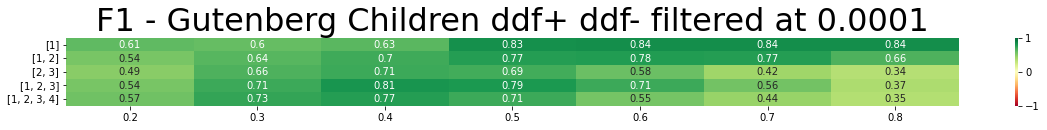

In [61]:
model_compress_with_loss(child_chars.model,0.0001)
print(child_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(child_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Children ddf+ ddf- filtered at 0.0001') 


8467484
N	thres.	F1
[1]	0.2	0.44
[1]	0.3	0.45
[1]	0.4	0.47
[1]	0.5	0.53
[1]	0.6	0.62
[1]	0.7	0.63
[1]	0.8	0.3
[1, 2]	0.2	0.46
[1, 2]	0.3	0.53
[1, 2]	0.4	0.61
[1, 2]	0.5	0.66
[1, 2]	0.6	0.69
[1, 2]	0.7	0.59
[1, 2]	0.8	0.36
[2, 3]	0.2	0.48
[2, 3]	0.3	0.62
[2, 3]	0.4	0.71
[2, 3]	0.5	0.7
[2, 3]	0.6	0.66
[2, 3]	0.7	0.51
[2, 3]	0.8	0.35
[1, 2, 3]	0.2	0.47
[1, 2, 3]	0.3	0.62
[1, 2, 3]	0.4	0.69
[1, 2, 3]	0.5	0.77
[1, 2, 3]	0.6	0.75
[1, 2, 3]	0.7	0.63
[1, 2, 3]	0.8	0.4
[1, 2, 3, 4]	0.2	0.52
[1, 2, 3, 4]	0.3	0.65
[1, 2, 3, 4]	0.4	0.73
[1, 2, 3, 4]	0.5	0.68
[1, 2, 3, 4]	0.6	0.58
[1, 2, 3, 4]	0.7	0.45
[1, 2, 3, 4]	0.8	0.34


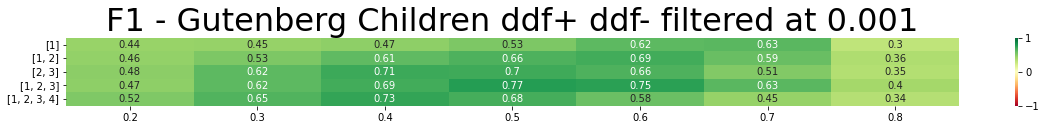

In [62]:
model_compress_with_loss(child_chars.model,0.001)
print(child_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(child_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Children ddf+ ddf- filtered at 0.001') 


In [63]:
del child_chars

N	thres.	F1
[1]	0.2	0.61
[1]	0.3	0.6
[1]	0.4	0.63
[1]	0.5	0.83
[1]	0.6	0.84
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.52
[1, 2]	0.3	0.6
[1, 2]	0.4	0.67
[1, 2]	0.5	0.66
[1, 2]	0.6	0.57
[1, 2]	0.7	0.51
[1, 2]	0.8	0.36
[2, 3]	0.2	0.56
[2, 3]	0.3	0.47
[2, 3]	0.4	0.4
[2, 3]	0.5	0.36
[2, 3]	0.6	0.32
[2, 3]	0.7	0.31
[2, 3]	0.8	0.31
[1, 2, 3]	0.2	0.6
[1, 2, 3]	0.3	0.48
[1, 2, 3]	0.4	0.4
[1, 2, 3]	0.5	0.37
[1, 2, 3]	0.6	0.32
[1, 2, 3]	0.7	0.31
[1, 2, 3]	0.8	0.31
[1, 2, 3, 4]	0.2	0.48
[1, 2, 3, 4]	0.3	0.41
[1, 2, 3, 4]	0.4	0.39
[1, 2, 3, 4]	0.5	0.33
[1, 2, 3, 4]	0.6	0.32
[1, 2, 3, 4]	0.7	0.31
[1, 2, 3, 4]	0.8	0.31


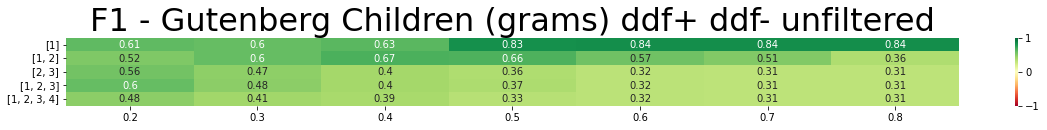

In [64]:
child_grams = FreedomTokenizer(name='data/models/gutenberg_child_grams_7a',max_n=7,mode='grams',debug=False)
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(child_grams.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Children (grams) ddf+ ddf- unfiltered') 


11276572
N	thres.	F1
[1]	0.2	0.61
[1]	0.3	0.6
[1]	0.4	0.63
[1]	0.5	0.83
[1]	0.6	0.84
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.52
[1, 2]	0.3	0.6
[1, 2]	0.4	0.67
[1, 2]	0.5	0.66
[1, 2]	0.6	0.57
[1, 2]	0.7	0.51
[1, 2]	0.8	0.36
[2, 3]	0.2	0.56
[2, 3]	0.3	0.47
[2, 3]	0.4	0.4
[2, 3]	0.5	0.36
[2, 3]	0.6	0.32
[2, 3]	0.7	0.31
[2, 3]	0.8	0.31
[1, 2, 3]	0.2	0.6
[1, 2, 3]	0.3	0.48
[1, 2, 3]	0.4	0.4
[1, 2, 3]	0.5	0.37
[1, 2, 3]	0.6	0.32
[1, 2, 3]	0.7	0.31
[1, 2, 3]	0.8	0.31
[1, 2, 3, 4]	0.2	0.48
[1, 2, 3, 4]	0.3	0.41
[1, 2, 3, 4]	0.4	0.39
[1, 2, 3, 4]	0.5	0.33
[1, 2, 3, 4]	0.6	0.32
[1, 2, 3, 4]	0.7	0.31
[1, 2, 3, 4]	0.8	0.31


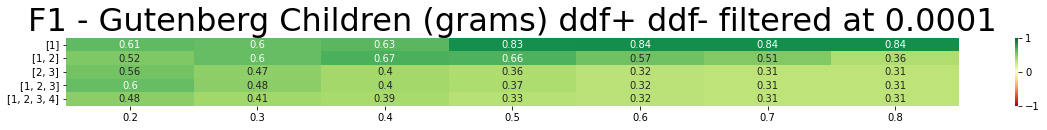

In [65]:
model_compress_with_loss(child_grams.model,0.0001)
print(child_grams.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(child_grams.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Children (grams) ddf+ ddf- filtered at 0.0001') 


11181927
N	thres.	F1
[1]	0.2	0.44
[1]	0.3	0.45
[1]	0.4	0.47
[1]	0.5	0.53
[1]	0.6	0.62
[1]	0.7	0.63
[1]	0.8	0.3
[1, 2]	0.2	0.54
[1, 2]	0.3	0.58
[1, 2]	0.4	0.68
[1, 2]	0.5	0.64
[1, 2]	0.6	0.57
[1, 2]	0.7	0.45
[1, 2]	0.8	0.34
[2, 3]	0.2	0.56
[2, 3]	0.3	0.47
[2, 3]	0.4	0.39
[2, 3]	0.5	0.36
[2, 3]	0.6	0.32
[2, 3]	0.7	0.31
[2, 3]	0.8	0.31
[1, 2, 3]	0.2	0.59
[1, 2, 3]	0.3	0.47
[1, 2, 3]	0.4	0.39
[1, 2, 3]	0.5	0.36
[1, 2, 3]	0.6	0.32
[1, 2, 3]	0.7	0.31
[1, 2, 3]	0.8	0.31
[1, 2, 3, 4]	0.2	0.48
[1, 2, 3, 4]	0.3	0.41
[1, 2, 3, 4]	0.4	0.37
[1, 2, 3, 4]	0.5	0.33
[1, 2, 3, 4]	0.6	0.32
[1, 2, 3, 4]	0.7	0.31
[1, 2, 3, 4]	0.8	0.31


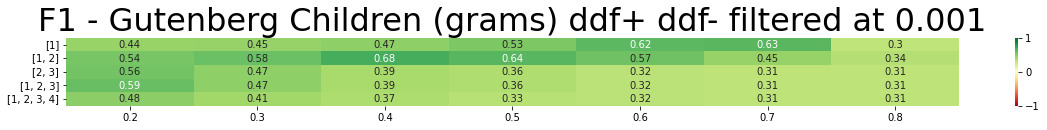

In [66]:
model_compress_with_loss(child_grams.model,0.001)
print(child_grams.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(child_grams.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Children (grams) ddf+ ddf- filtered at 0.001') 


In [ ]:
del child_grams

N	thres.	F1
[1]	0.2	0.61
[1]	0.3	0.6
[1]	0.4	0.63
[1]	0.5	0.83
[1]	0.6	0.84
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.54
[1, 2]	0.3	0.64
[1, 2]	0.4	0.7
[1, 2]	0.5	0.77
[1, 2]	0.6	0.78
[1, 2]	0.7	0.77
[1, 2]	0.8	0.66
[2, 3]	0.2	0.49
[2, 3]	0.3	0.66
[2, 3]	0.4	0.71
[2, 3]	0.5	0.69
[2, 3]	0.6	0.58
[2, 3]	0.7	0.42
[2, 3]	0.8	0.34
[1, 2, 3]	0.2	0.54
[1, 2, 3]	0.3	0.71
[1, 2, 3]	0.4	0.81
[1, 2, 3]	0.5	0.79
[1, 2, 3]	0.6	0.71
[1, 2, 3]	0.7	0.56
[1, 2, 3]	0.8	0.37
[1, 2, 3, 4]	0.2	0.57
[1, 2, 3, 4]	0.3	0.73
[1, 2, 3, 4]	0.4	0.77
[1, 2, 3, 4]	0.5	0.71
[1, 2, 3, 4]	0.6	0.55
[1, 2, 3, 4]	0.7	0.44
[1, 2, 3, 4]	0.8	0.35


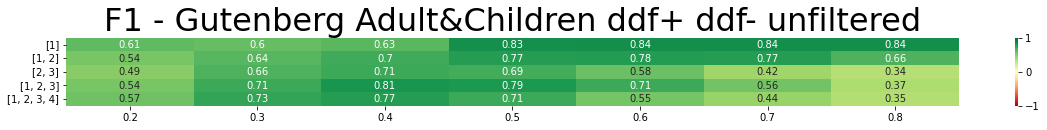

In [68]:
both_chars = FreedomTokenizer(name='data/models/gutenberg_both_chars_7a',max_n=7,mode='chars',debug=False)
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(both_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult&Children ddf+ ddf- unfiltered') 


32835638
N	thres.	F1
[1]	0.2	0.61
[1]	0.3	0.6
[1]	0.4	0.63
[1]	0.5	0.83
[1]	0.6	0.84
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.54
[1, 2]	0.3	0.64
[1, 2]	0.4	0.7
[1, 2]	0.5	0.77
[1, 2]	0.6	0.78
[1, 2]	0.7	0.77
[1, 2]	0.8	0.66
[2, 3]	0.2	0.49
[2, 3]	0.3	0.66
[2, 3]	0.4	0.71
[2, 3]	0.5	0.69
[2, 3]	0.6	0.58
[2, 3]	0.7	0.42
[2, 3]	0.8	0.34
[1, 2, 3]	0.2	0.54
[1, 2, 3]	0.3	0.71
[1, 2, 3]	0.4	0.81
[1, 2, 3]	0.5	0.79
[1, 2, 3]	0.6	0.71
[1, 2, 3]	0.7	0.56
[1, 2, 3]	0.8	0.37
[1, 2, 3, 4]	0.2	0.57
[1, 2, 3, 4]	0.3	0.73
[1, 2, 3, 4]	0.4	0.77
[1, 2, 3, 4]	0.5	0.71
[1, 2, 3, 4]	0.6	0.55
[1, 2, 3, 4]	0.7	0.44
[1, 2, 3, 4]	0.8	0.35


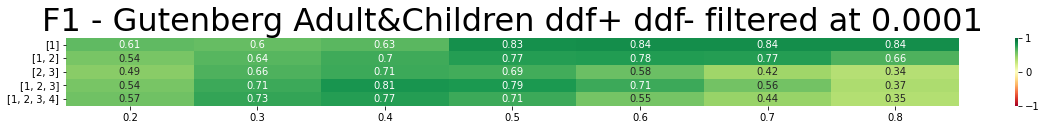

In [69]:
model_compress_with_loss(both_chars.model,0.0001)
print(both_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(both_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult&Children ddf+ ddf- filtered at 0.0001') 


32466920
N	thres.	F1
[1]	0.2	0.44
[1]	0.3	0.45
[1]	0.4	0.47
[1]	0.5	0.53
[1]	0.6	0.62
[1]	0.7	0.63
[1]	0.8	0.3
[1, 2]	0.2	0.46
[1, 2]	0.3	0.53
[1, 2]	0.4	0.61
[1, 2]	0.5	0.66
[1, 2]	0.6	0.69
[1, 2]	0.7	0.59
[1, 2]	0.8	0.36
[2, 3]	0.2	0.48
[2, 3]	0.3	0.62
[2, 3]	0.4	0.71
[2, 3]	0.5	0.7
[2, 3]	0.6	0.66
[2, 3]	0.7	0.51
[2, 3]	0.8	0.35
[1, 2, 3]	0.2	0.47
[1, 2, 3]	0.3	0.62
[1, 2, 3]	0.4	0.69
[1, 2, 3]	0.5	0.77
[1, 2, 3]	0.6	0.75
[1, 2, 3]	0.7	0.63
[1, 2, 3]	0.8	0.4
[1, 2, 3, 4]	0.2	0.52
[1, 2, 3, 4]	0.3	0.65
[1, 2, 3, 4]	0.4	0.73
[1, 2, 3, 4]	0.5	0.68
[1, 2, 3, 4]	0.6	0.58
[1, 2, 3, 4]	0.7	0.45
[1, 2, 3, 4]	0.8	0.34


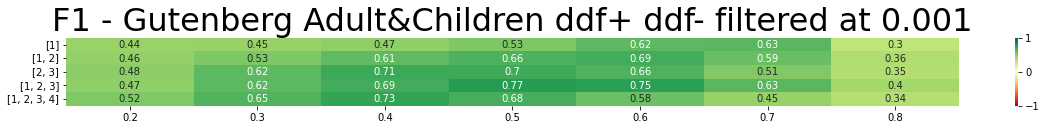

In [70]:
model_compress_with_loss(both_chars.model,0.001)
print(both_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(both_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Gutenberg Adult&Children ddf+ ddf- filtered at 0.001') 


In [71]:
del both_chars


N	thres.	F1
[1]	0.2	0.73
[1]	0.3	0.75
[1]	0.4	0.71
[1]	0.5	0.69
[1]	0.6	0.69
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.57
[1, 2]	0.3	0.75
[1, 2]	0.4	0.92
[1, 2]	0.5	0.93
[1, 2]	0.6	0.85
[1, 2]	0.7	0.8
[1, 2]	0.8	0.76
[2, 3]	0.2	0.65
[2, 3]	0.3	0.77
[2, 3]	0.4	0.83
[2, 3]	0.5	0.81
[2, 3]	0.6	0.78
[2, 3]	0.7	0.64
[2, 3]	0.8	0.53
[1, 2, 3]	0.2	0.72
[1, 2, 3]	0.3	0.86
[1, 2, 3]	0.4	0.88
[1, 2, 3]	0.5	0.89
[1, 2, 3]	0.6	0.82
[1, 2, 3]	0.7	0.69
[1, 2, 3]	0.8	0.56
[1, 2, 3, 4]	0.2	0.81
[1, 2, 3, 4]	0.3	0.88
[1, 2, 3, 4]	0.4	0.84
[1, 2, 3, 4]	0.5	0.78
[1, 2, 3, 4]	0.6	0.69
[1, 2, 3, 4]	0.7	0.51
[1, 2, 3, 4]	0.8	0.4


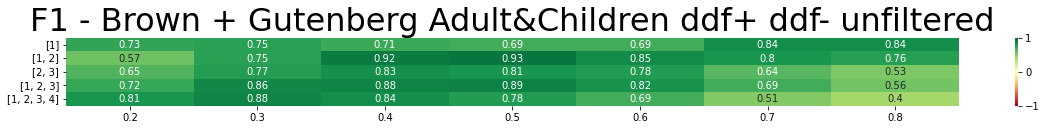

In [72]:
gutenberg_brown_chars = FreedomTokenizer(name='data/models/gutenberg_brown_chars_7a',max_n=7,mode='chars',debug=False)
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(gutenberg_brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown + Gutenberg Adult&Children ddf+ ddf- unfiltered') 


36917711
N	thres.	F1
[1]	0.2	0.94
[1]	0.3	0.97
[1]	0.4	0.99
[1]	0.5	0.95
[1]	0.6	0.9
[1]	0.7	0.91
[1]	0.8	0.91
[1, 2]	0.2	0.62
[1, 2]	0.3	0.78
[1, 2]	0.4	0.95
[1, 2]	0.5	0.96
[1, 2]	0.6	0.92
[1, 2]	0.7	0.83
[1, 2]	0.8	0.79
[2, 3]	0.2	0.65
[2, 3]	0.3	0.76
[2, 3]	0.4	0.84
[2, 3]	0.5	0.83
[2, 3]	0.6	0.8
[2, 3]	0.7	0.68
[2, 3]	0.8	0.55
[1, 2, 3]	0.2	0.72
[1, 2, 3]	0.3	0.85
[1, 2, 3]	0.4	0.92
[1, 2, 3]	0.5	0.89
[1, 2, 3]	0.6	0.85
[1, 2, 3]	0.7	0.72
[1, 2, 3]	0.8	0.59
[1, 2, 3, 4]	0.2	0.8
[1, 2, 3, 4]	0.3	0.88
[1, 2, 3, 4]	0.4	0.86
[1, 2, 3, 4]	0.5	0.8
[1, 2, 3, 4]	0.6	0.71
[1, 2, 3, 4]	0.7	0.55
[1, 2, 3, 4]	0.8	0.41


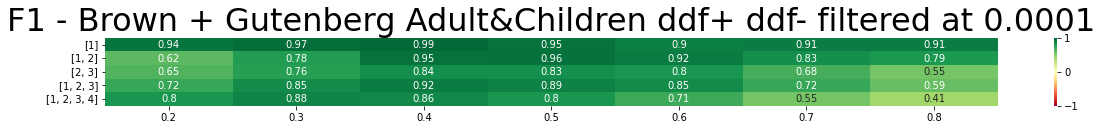

In [73]:
model_compress_with_loss(gutenberg_brown_chars.model,0.0001)
print(gutenberg_brown_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(gutenberg_brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown + Gutenberg Adult&Children ddf+ ddf- filtered at 0.0001') 


36866590
N	thres.	F1
[1]	0.2	0.63
[1]	0.3	0.63
[1]	0.4	0.86
[1]	0.5	0.97
[1]	0.6	0.92
[1]	0.7	0.85
[1]	0.8	0.84
[1, 2]	0.2	0.64
[1, 2]	0.3	0.78
[1, 2]	0.4	0.86
[1, 2]	0.5	0.96
[1, 2]	0.6	0.94
[1, 2]	0.7	0.78
[1, 2]	0.8	0.7
[2, 3]	0.2	0.69
[2, 3]	0.3	0.81
[2, 3]	0.4	0.87
[2, 3]	0.5	0.88
[2, 3]	0.6	0.77
[2, 3]	0.7	0.64
[2, 3]	0.8	0.39
[1, 2, 3]	0.2	0.71
[1, 2, 3]	0.3	0.84
[1, 2, 3]	0.4	0.93
[1, 2, 3]	0.5	0.93
[1, 2, 3]	0.6	0.87
[1, 2, 3]	0.7	0.73
[1, 2, 3]	0.8	0.48
[1, 2, 3, 4]	0.2	0.77
[1, 2, 3, 4]	0.3	0.9
[1, 2, 3, 4]	0.4	0.9
[1, 2, 3, 4]	0.5	0.87
[1, 2, 3, 4]	0.6	0.76
[1, 2, 3, 4]	0.7	0.61
[1, 2, 3, 4]	0.8	0.38


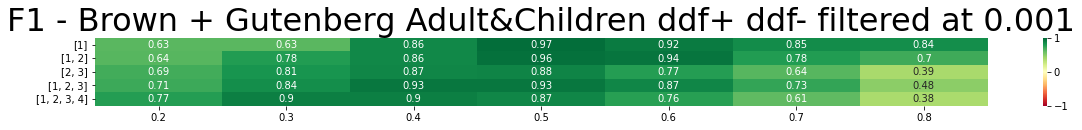

In [74]:
model_compress_with_loss(gutenberg_brown_chars.model,0.001)
print(gutenberg_brown_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(gutenberg_brown_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown + Gutenberg Adult&Children ddf+ ddf- filtered at 0.001') 


In [75]:
del gutenberg_brown_chars


N	thres.	F1
[1]	0.2	0.84
[1]	0.3	0.84
[1]	0.4	0.84
[1]	0.5	0.84
[1]	0.6	0.84
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.84
[1, 2]	0.3	0.84
[1, 2]	0.4	0.84
[1, 2]	0.5	0.84
[1, 2]	0.6	0.8
[1, 2]	0.7	0.63
[1, 2]	0.8	0.44
[2, 3]	0.2	0.63
[2, 3]	0.3	0.49
[2, 3]	0.4	0.43
[2, 3]	0.5	0.39
[2, 3]	0.6	0.36
[2, 3]	0.7	0.34
[2, 3]	0.8	0.33
[1, 2, 3]	0.2	0.84
[1, 2, 3]	0.3	0.84
[1, 2, 3]	0.4	0.84
[1, 2, 3]	0.5	0.8
[1, 2, 3]	0.6	0.64
[1, 2, 3]	0.7	0.46
[1, 2, 3]	0.8	0.41
[1, 2, 3, 4]	0.2	0.84
[1, 2, 3, 4]	0.3	0.84
[1, 2, 3, 4]	0.4	0.84
[1, 2, 3, 4]	0.5	0.77
[1, 2, 3, 4]	0.6	0.62
[1, 2, 3, 4]	0.7	0.44
[1, 2, 3, 4]	0.8	0.37


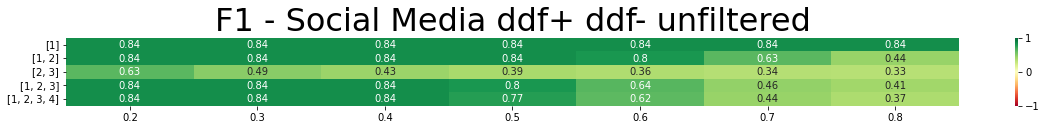

In [76]:
social_media_chars = FreedomTokenizer(name='data/models/social_media_chars_7a',max_n=7,mode='chars',debug=False)
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(social_media_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Social Media ddf+ ddf- unfiltered') 


39541983
N	thres.	F1
[1]	0.2	0.84
[1]	0.3	0.84
[1]	0.4	0.84
[1]	0.5	0.84
[1]	0.6	0.84
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.84
[1, 2]	0.3	0.84
[1, 2]	0.4	0.81
[1, 2]	0.5	0.52
[1, 2]	0.6	0.37
[1, 2]	0.7	0.34
[1, 2]	0.8	0.33
[2, 3]	0.2	0.69
[2, 3]	0.3	0.54
[2, 3]	0.4	0.42
[2, 3]	0.5	0.35
[2, 3]	0.6	0.34
[2, 3]	0.7	0.32
[2, 3]	0.8	0.32
[1, 2, 3]	0.2	0.84
[1, 2, 3]	0.3	0.81
[1, 2, 3]	0.4	0.7
[1, 2, 3]	0.5	0.53
[1, 2, 3]	0.6	0.38
[1, 2, 3]	0.7	0.34
[1, 2, 3]	0.8	0.32
[1, 2, 3, 4]	0.2	0.85
[1, 2, 3, 4]	0.3	0.79
[1, 2, 3, 4]	0.4	0.6
[1, 2, 3, 4]	0.5	0.46
[1, 2, 3, 4]	0.6	0.39
[1, 2, 3, 4]	0.7	0.34
[1, 2, 3, 4]	0.8	0.32


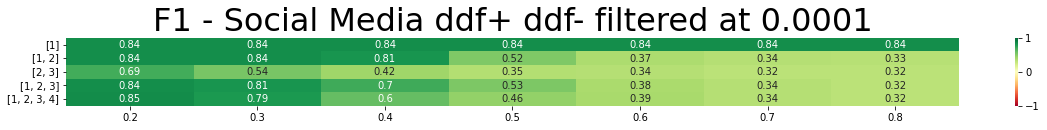

In [77]:
model_compress_with_loss(social_media_chars.model,0.0001)
print(social_media_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(social_media_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Social Media ddf+ ddf- filtered at 0.0001') 


39249041
N	thres.	F1
[1]	0.2	0.83
[1]	0.3	0.83
[1]	0.4	0.84
[1]	0.5	0.84
[1]	0.6	0.84
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.8
[1, 2]	0.3	0.84
[1, 2]	0.4	0.8
[1, 2]	0.5	0.73
[1, 2]	0.6	0.38
[1, 2]	0.7	0.35
[1, 2]	0.8	0.34
[2, 3]	0.2	0.85
[2, 3]	0.3	0.76
[2, 3]	0.4	0.64
[2, 3]	0.5	0.42
[2, 3]	0.6	0.36
[2, 3]	0.7	0.33
[2, 3]	0.8	0.32
[1, 2, 3]	0.2	0.88
[1, 2, 3]	0.3	0.83
[1, 2, 3]	0.4	0.79
[1, 2, 3]	0.5	0.69
[1, 2, 3]	0.6	0.41
[1, 2, 3]	0.7	0.35
[1, 2, 3]	0.8	0.32
[1, 2, 3, 4]	0.2	0.92
[1, 2, 3, 4]	0.3	0.88
[1, 2, 3, 4]	0.4	0.77
[1, 2, 3, 4]	0.5	0.63
[1, 2, 3, 4]	0.6	0.46
[1, 2, 3, 4]	0.7	0.36
[1, 2, 3, 4]	0.8	0.33


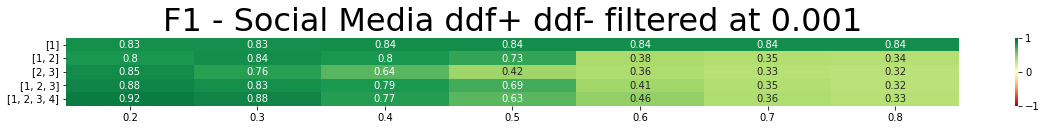

In [78]:
model_compress_with_loss(social_media_chars.model,0.001)
print(social_media_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(social_media_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Social Media ddf+ ddf- filtered at 0.001') 


In [79]:
del social_media_chars


91911837
N	thres.	F1
[1]	0.2	0.84
[1]	0.3	0.84
[1]	0.4	0.84
[1]	0.5	0.84
[1]	0.6	0.84
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.84
[1, 2]	0.3	0.84
[1, 2]	0.4	0.84
[1, 2]	0.5	0.84
[1, 2]	0.6	0.8
[1, 2]	0.7	0.63
[1, 2]	0.8	0.44
[2, 3]	0.2	0.63
[2, 3]	0.3	0.49
[2, 3]	0.4	0.43
[2, 3]	0.5	0.39
[2, 3]	0.6	0.36
[2, 3]	0.7	0.34
[2, 3]	0.8	0.33
[1, 2, 3]	0.2	0.84
[1, 2, 3]	0.3	0.84
[1, 2, 3]	0.4	0.84
[1, 2, 3]	0.5	0.8
[1, 2, 3]	0.6	0.64
[1, 2, 3]	0.7	0.46
[1, 2, 3]	0.8	0.41
[1, 2, 3, 4]	0.2	0.84
[1, 2, 3, 4]	0.3	0.84
[1, 2, 3, 4]	0.4	0.84
[1, 2, 3, 4]	0.5	0.77
[1, 2, 3, 4]	0.6	0.62
[1, 2, 3, 4]	0.7	0.44
[1, 2, 3, 4]	0.8	0.37


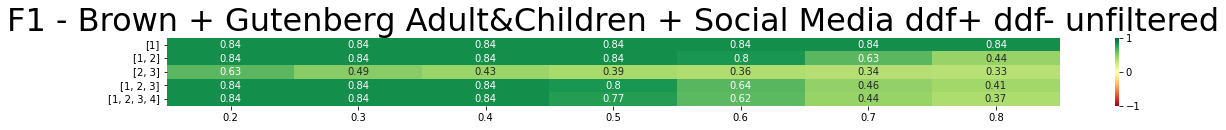

In [80]:
gutenberg_brown_social_media_chars = FreedomTokenizer(name='data/models/gutenberg_brown_social_media_chars_7a',max_n=7,mode='chars',debug=False)
print(gutenberg_brown_social_media_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(gutenberg_brown_social_media_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown + Gutenberg Adult&Children + Social Media ddf+ ddf- unfiltered') 


66916741
N	thres.	F1
[1]	0.2	0.84
[1]	0.3	0.84
[1]	0.4	0.84
[1]	0.5	0.84
[1]	0.6	0.84
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.84
[1, 2]	0.3	0.84
[1, 2]	0.4	0.81
[1, 2]	0.5	0.52
[1, 2]	0.6	0.37
[1, 2]	0.7	0.34
[1, 2]	0.8	0.33
[2, 3]	0.2	0.69
[2, 3]	0.3	0.54
[2, 3]	0.4	0.42
[2, 3]	0.5	0.35
[2, 3]	0.6	0.34
[2, 3]	0.7	0.32
[2, 3]	0.8	0.32
[1, 2, 3]	0.2	0.84
[1, 2, 3]	0.3	0.81
[1, 2, 3]	0.4	0.7
[1, 2, 3]	0.5	0.53
[1, 2, 3]	0.6	0.38
[1, 2, 3]	0.7	0.34
[1, 2, 3]	0.8	0.32
[1, 2, 3, 4]	0.2	0.85
[1, 2, 3, 4]	0.3	0.79
[1, 2, 3, 4]	0.4	0.6
[1, 2, 3, 4]	0.5	0.46
[1, 2, 3, 4]	0.6	0.39
[1, 2, 3, 4]	0.7	0.34
[1, 2, 3, 4]	0.8	0.32


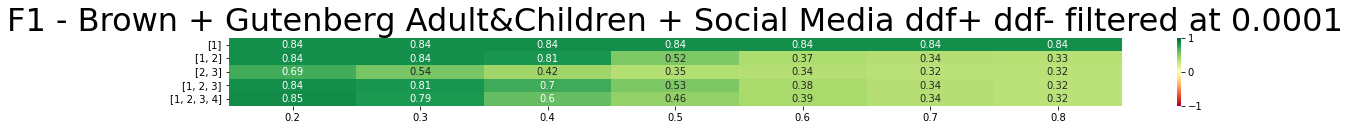

In [81]:
model_compress_with_loss(gutenberg_brown_social_media_chars.model,0.0001)
print(gutenberg_brown_social_media_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(gutenberg_brown_social_media_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown + Gutenberg Adult&Children + Social Media ddf+ ddf- filtered at 0.0001') 


66623666
N	thres.	F1
[1]	0.2	0.83
[1]	0.3	0.83
[1]	0.4	0.84
[1]	0.5	0.84
[1]	0.6	0.84
[1]	0.7	0.84
[1]	0.8	0.84
[1, 2]	0.2	0.8
[1, 2]	0.3	0.84
[1, 2]	0.4	0.8
[1, 2]	0.5	0.73
[1, 2]	0.6	0.38
[1, 2]	0.7	0.35
[1, 2]	0.8	0.34
[2, 3]	0.2	0.85
[2, 3]	0.3	0.76
[2, 3]	0.4	0.64
[2, 3]	0.5	0.42
[2, 3]	0.6	0.36
[2, 3]	0.7	0.33
[2, 3]	0.8	0.32
[1, 2, 3]	0.2	0.87
[1, 2, 3]	0.3	0.83
[1, 2, 3]	0.4	0.79
[1, 2, 3]	0.5	0.69
[1, 2, 3]	0.6	0.41
[1, 2, 3]	0.7	0.35
[1, 2, 3]	0.8	0.32
[1, 2, 3, 4]	0.2	0.92
[1, 2, 3, 4]	0.3	0.88
[1, 2, 3, 4]	0.4	0.77
[1, 2, 3, 4]	0.5	0.63
[1, 2, 3, 4]	0.6	0.46
[1, 2, 3, 4]	0.7	0.36
[1, 2, 3, 4]	0.8	0.33


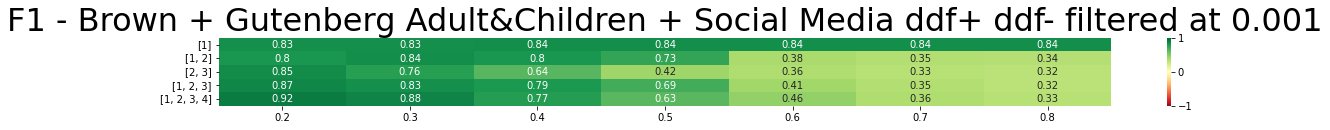

In [82]:
model_compress_with_loss(gutenberg_brown_social_media_chars.model,0.001)
print(gutenberg_brown_social_media_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(gutenberg_brown_social_media_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown + Gutenberg Adult&Children + Social Media ddf+ ddf- filtered at 0.001') 


65559937
N	thres.	F1
[1]	0.2	0.71
[1]	0.3	0.86
[1]	0.4	0.86
[1]	0.5	0.86
[1]	0.6	0.88
[1]	0.7	0.76
[1]	0.8	0.76
[1, 2]	0.2	0.8
[1, 2]	0.3	0.93
[1, 2]	0.4	0.9
[1, 2]	0.5	0.82
[1, 2]	0.6	0.75
[1, 2]	0.7	0.45
[1, 2]	0.8	0.41
[2, 3]	0.2	0.79
[2, 3]	0.3	0.89
[2, 3]	0.4	0.88
[2, 3]	0.5	0.73
[2, 3]	0.6	0.52
[2, 3]	0.7	0.41
[2, 3]	0.8	0.34
[1, 2, 3]	0.2	0.81
[1, 2, 3]	0.3	0.94
[1, 2, 3]	0.4	0.97
[1, 2, 3]	0.5	0.87
[1, 2, 3]	0.6	0.68
[1, 2, 3]	0.7	0.49
[1, 2, 3]	0.8	0.37
[1, 2, 3, 4]	0.2	0.78
[1, 2, 3, 4]	0.3	0.94
[1, 2, 3, 4]	0.4	0.94
[1, 2, 3, 4]	0.5	0.88
[1, 2, 3, 4]	0.6	0.69
[1, 2, 3, 4]	0.7	0.5
[1, 2, 3, 4]	0.8	0.36


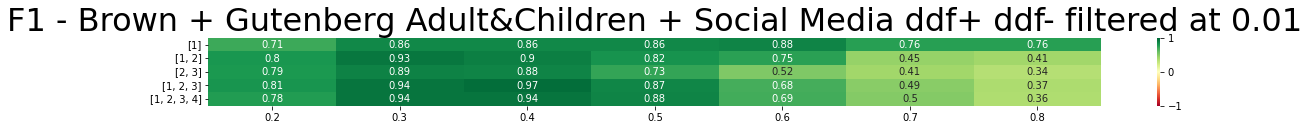

In [83]:
model_compress_with_loss(gutenberg_brown_social_media_chars.model,0.01)
print(gutenberg_brown_social_media_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(gutenberg_brown_social_media_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown + Gutenberg Adult&Children + Social Media ddf+ ddf- filtered at 0.01') 


61848203
N	thres.	F1
[1]	0.2	0.35
[1]	0.3	0.36
[1]	0.4	0.37
[1]	0.5	0.42
[1]	0.6	0.42
[1]	0.7	0.44
[1]	0.8	0.45
[1, 2]	0.2	0.44
[1, 2]	0.3	0.51
[1, 2]	0.4	0.52
[1, 2]	0.5	0.49
[1, 2]	0.6	0.44
[1, 2]	0.7	0.44
[1, 2]	0.8	0.36
[2, 3]	0.2	0.55
[2, 3]	0.3	0.65
[2, 3]	0.4	0.68
[2, 3]	0.5	0.61
[2, 3]	0.6	0.46
[2, 3]	0.7	0.35
[2, 3]	0.8	0.31
[1, 2, 3]	0.2	0.51
[1, 2, 3]	0.3	0.59
[1, 2, 3]	0.4	0.67
[1, 2, 3]	0.5	0.65
[1, 2, 3]	0.6	0.56
[1, 2, 3]	0.7	0.39
[1, 2, 3]	0.8	0.32
[1, 2, 3, 4]	0.2	0.5
[1, 2, 3, 4]	0.3	0.6
[1, 2, 3, 4]	0.4	0.71
[1, 2, 3, 4]	0.5	0.66
[1, 2, 3, 4]	0.6	0.6
[1, 2, 3, 4]	0.7	0.47
[1, 2, 3, 4]	0.8	0.35


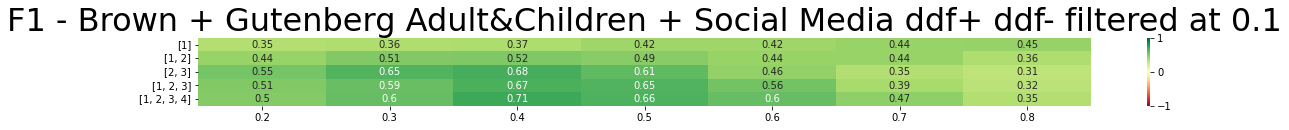

In [84]:
model_compress_with_loss(gutenberg_brown_social_media_chars.model,0.1)
print(gutenberg_brown_social_media_chars.count_params())
print("N\tthres.\tF1")
rlist = []
for nlist in [[1],[1,2],[2,3],[1,2,3],[1,2,3,4]]:
    for threshold in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]: 
        rlist.append(evaluate_tokenizer(gutenberg_brown_social_media_chars.model,test_texts,'ddf-','ddf+',nlist,threshold,spaces=False))
r,c,m = list2matrix(rlist)
matrix_plot(r,c,m,1.0,'F1 - Brown + Gutenberg Adult&Children + Social Media ddf+ ddf- filtered at 0.1') 


In [85]:
del gutenberg_brown_social_media_chars
